In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
data_count = 500
# random data from 1000 to 3000 (the area of the house in feet^2)
area = np.random.rand(data_count) * 2000 + 1000   
# random data from 1 to 10 (the number of rooms in the house)
rooms = np.random.rand(data_count) * 9 + 1
# random data from 1 to 5 (the number of bathrooms in the house)
bathrooms = np.random.rand(data_count) * 4 + 1
# random data from 1 to 3 (the number of floors in the house)
floors = np.random.rand(data_count) * 2 + 1
# random data from 1 to 20 (the number of years since the house was built)
age = np.random.rand(data_count) * 19 + 1

# generate x_train (the features of the house)
x_train = np.array([area, rooms, bathrooms, floors, age]).T

# generate y_train (the price of the house)
y_train = x_train.dot(np.array([1000, 5000, 3000, 2000, 1000])) + 10000

print(y_train[0:10])      

[1417580.72154751 2716121.58964251 1722765.57135864 1276806.86466396
 1530054.49237274 1913563.96726212 2199448.92560326 2468408.12378642
 2817591.93938934 2705616.41570001]


In [15]:
# normalize data
# subtract the mean and divide by the standard deviation
original_x_train = x_train
original_y_train = y_train
# x_train is a 2D array, so we need to specify the axis
x_train = (x_train - np.mean(x_train, axis=0)) / np.std(x_train, axis=0)
y_train = (y_train - np.mean(y_train)) / np.std(y_train)
print(y_train[0:10])
x_train = x_train.T

[-1.21075625  1.08213736 -0.67187726 -1.45932715 -1.01215612 -0.33497572
  0.16982456  0.64473825  1.26130824  1.06358789]


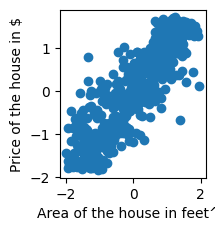

In [16]:
# plot the data
# x_train cantains 5 features, so we need to plot 5 graphs
plt.subplot(2, 3, 1)
plt.scatter(x_train[:, 0], y_train)
plt.xlabel('Area of the house in feet^2')
plt.ylabel('Price of the house in $')
plt.show()

In [5]:
def compute_cost(x,y,t0,t1):
    return np.sum((t0 + t1*x - y)**2) / (2*len(x))

In [6]:
# give an initial value to theta0 and theta1
theta0 = np.random.rand() 
theta1 = np.random.rand() 
print(theta0, theta1)

0.6268638797176429 0.5752575122821197


In [7]:
def gradient(t0, t1, x, y, alpha=0.25, iterations=1000, plot=False):
    costs = []
    while (compute_cost(x,y,t0,t1) > 0.01 and iterations > 0):
        t0 = t0 - alpha * np.sum(t0 + t1*x - y) / len(x)
        t1 = t1 - alpha * np.sum((t0 + t1*x - y)*x) / len(x)
        costs.append(compute_cost(x,y,t0,t1))
        iterations -= 1

    if plot:
        iters = np.arange(0, len(costs))
        plt.plot(iters, costs)
        plt.xlabel("Iterations")
        plt.ylabel("Cost")
        plt.show()           


    return t0, t1

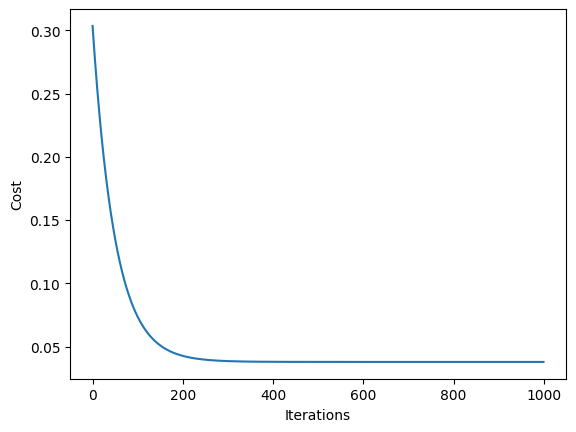

2.7062495644073265e-05 0.9613431680454508


In [8]:
theta0, theta1 = gradient(theta0, theta1, x_train, y_train, 0.01, 1000, True)
print(theta0, theta1)

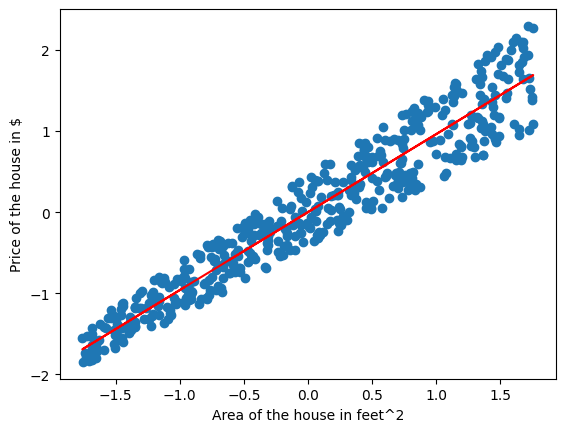

[-0.93139607 -1.16057519  0.32631689  1.40671942  0.39081689 -0.15661856
  1.66364599 -0.30729073 -1.33827119 -1.23199874]


In [9]:

y_test = theta0 + theta1*x_train
plt.scatter(x_train, y_train)
plt.plot(x_train, y_test, c='r')
plt.xlabel("Area of the house in feet^2")
plt.ylabel("Price of the house in $")
plt.show()
print(y_test[0:10])

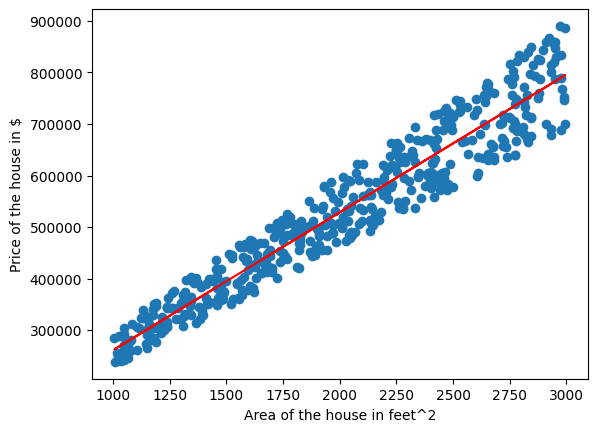

In [10]:
# get the original data
original_y_test= y_test * np.std(original_y_train) + np.mean(original_y_train)
# plot the original data
plt.scatter(original_x_train, original_y_train)
plt.plot(original_x_train, original_y_test, c='r')
plt.xlabel("Area of the house in feet^2")
plt.ylabel("Price of the house in $")
plt.show()


In [11]:
# check the accuracy of the model
# this broken fix it
def r2_score(y, y_pred):
    return 1 - np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2)

score =r2_score(original_y_train, original_y_test)
if(score > 0.9):
    print("The model is accurate with a score of", round(score, 5))
else:
    print("The model is not accurate with a score of", round(score, 5))

The model is accurate with a score of 0.92421
